<a href="https://colab.research.google.com/github/9922829133/Regression-1/blob/main/Transport_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Transport Demand Prediction
##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Sachin Chavan

# **Project Summery -**
Transport Demand Prediction is a critical aspect of optimizing transportation services, managing resources efficiently, and ensuring better service delivery. In this project, the primary objective was to forecast the demand for transportation services based on various factors and historical data.

The project involved collecting and analyzing transportation-related datasets containing information such as travel dates, times, routes, payment methods, and vehicle types. The key steps included data preprocessing, feature engineering, and the application of machine learning models for prediction.

Data preprocessing involved handling missing values, converting categorical variables into a suitable numerical format (like one-hot encoding or label encoding), and extracting relevant features from date and time information.

Feature engineering focused on selecting and engineering features that might influence transportation demand, such as payment methods, travel origins, destinations, and vehicle capacities. This step aimed to create informative predictors for the demand forecasting models.

The machine learning phase included the selection and training of predictive models like RandomForestRegressor, DecisionTreeRegressor, or other suitable algorithms. Model performance was evaluated using metrics such as Mean Squared Error (MSE), and visualizations were created to compare predicted demand against actual demand values.

The project's ultimate goal was to build accurate demand prediction models that could assist transportation services in better managing resources, optimizing schedules, and ultimately improving service quality and customer satisfaction. The models' insights could be leveraged to anticipate demand fluctuations, optimize vehicle deployment, and make data-driven decisions to enhance overall transportation efficiency.

# **GitHub Link -**

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori
### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

# **General Guidelines** : -
**Project Evaluation Criteria**

Efficient EDA

Encoding if necessary.

Feature selection, new feature creation

Dealing with multicollinearity if any

Feature scaling

Understanding the target feature and its distribution

Modeling - use at least two algorithms

Evaluation and improvement of model.

Feature Importance and Conclusion



# ***Let's Begin !***

**Import Libraries**

In [ ]:
#importing Libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor



**Dataset Loading**

In [ ]:
# Load dataset
data = pd.read_csv('/content/train_revised.csv')

**Dataset First View**

In [ ]:
# Display basic information about the dataset
data.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


 **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 51645
Number of Columns: 10


**Dataset Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


**Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
print("Duplicate Value Count:",data.duplicated().sum())
# We have removed these duplicate values using drop.duplicate
data.drop_duplicates(inplace=True)
# After droping duplicate vaues we have 87396 rows
rows_after_droping_duplicates=data.shape[0]
print("Rows count after removing duplicate values:",rows_after_droping_duplicates)

Duplicate Value Count: 0
Rows count after removing duplicate values: 51645


In [ ]:
# Missing Values/Null Values Count
print('Null value count:\n',data.isnull().sum().sort_values(ascending=0))

Null value count:
 ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64


 **Understanding Your Variables**

In [ ]:
# Dataset Columns
print(data.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')


In [ ]:
# Dataset Describe
data.describe()

,ride_id,max_capacity
count,51645.000000,51645.000000
mean,10188.645793,34.534321
std,2211.295708,18.451193
min,1442.000000,11.000000
25%,8287.000000,11.000000
50%,10353.000000,49.000000
75%,12029.000000,49.000000
max,20117.000000,49.000000


**Check Unique Values for each variable .**

In [ ]:
# Check Unique Values for each variable.
print(data.apply(lambda column: column.unique()))

ride_id            [1442, 5437, 5710, 5777, 5778, 5781, 5784, 578...
seat_number        [15A, 14A, 8B, 19A, 11A, 18B, 25, 21B, 22A, 17...
payment_method                                         [Mpesa, Cash]
payment_receipt    [UZUEHCBUSO, TIHLBUSGTE, EQX8Q5G19O, SGP18CL0M...
travel_date        [17-10-17, 19-11-17, 26-11-17, 27-11-17, 20-04...
travel_time        [7:15, 7:12, 7:05, 7:10, 7:09, 5:10, 9:50, 7:0...
travel_from        [Migori, Keroka, Homa Bay, Kisii, Keumbu, Rong...
travel_to                                                  [Nairobi]
car_type                                              [Bus, shuttle]
max_capacity                                                [49, 11]
dtype: object


In [ ]:
#cheking unique value
len(data['ride_id'].unique())

6249

In [ ]:
#dataset columns
print(data.columns)

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')


**EDA**

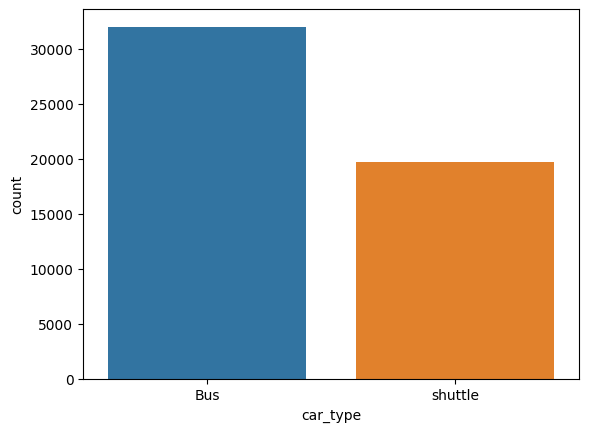

In [ ]:
# Assuming 'car_type' contains categorical/string data
sns.countplot(data=data, x='car_type')
plt.show()


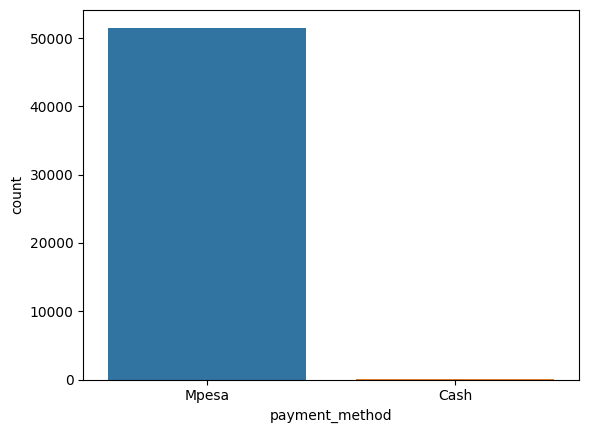

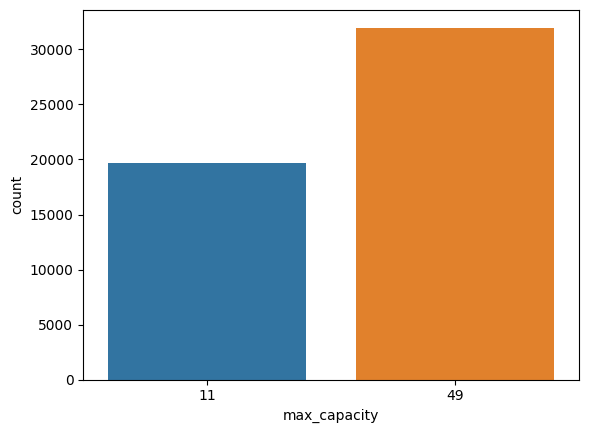

In [ ]:
plot_count_cols = ['payment_method', 'max_capacity']

for col in plot_count_cols:
    sns.countplot(data=data, x=col)
    plt.show()

 1 There are two type of payment methods people have used to buy the tickets.

2  There are two type of cars Bus and shuttle and the maximum capacity of the bus is 49 while shuttle can contain 11 travelers.

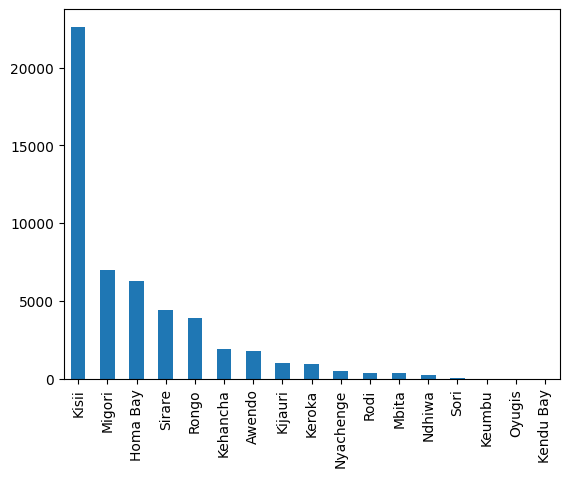

In [ ]:
data['travel_from'].value_counts().plot(kind='bar')
plt.show()

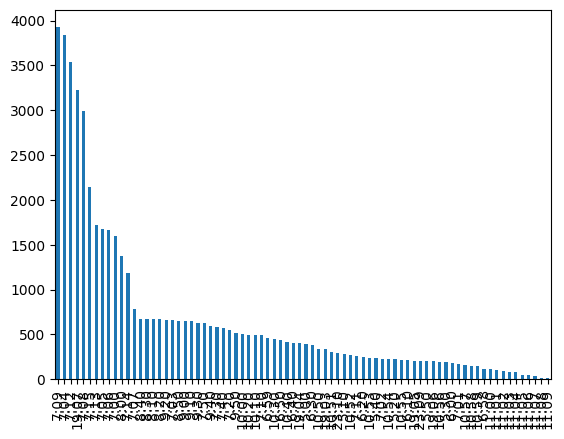

In [ ]:
data['travel_time'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
data.head()


,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
# droping the column
data.drop('travel_date', axis=1, inplace=True)

In [ ]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,7:12,Migori,Nairobi,Bus,49


**Encode categorical variables using one-hot encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['payment_method', 'payment_receipt','travel_from', 'travel_to', 'car_type','travel_time']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    data[column] = label_encoder.fit_transform(data[column])

**Assuming 'demand' is the target variable**

In [ ]:
# Columns for features (X)
X_columns = ['payment_method', 'travel_time', 'travel_from', 'travel_to', 'car_type','payment_receipt',]

# Selecting the features (X) and the target variable (y)
X = data[X_columns]  # Features
y = data['max_capacity']  # Target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
data.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,1,43276,61,9,0,0,49
1,5437,14A,1,40729,58,9,0,0,49
2,5710,8B,1,16007,51,4,0,0,49
3,5777,19A,1,39000,56,1,0,0,49
4,5778,11A,1,10833,58,9,0,0,49


**1. Using LinearRegression**

In [ ]:
# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)
# Calculating model accuracy (MSE for simplicity)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")



Mean Squared Error (MSE): 3.9936604380286295e-26


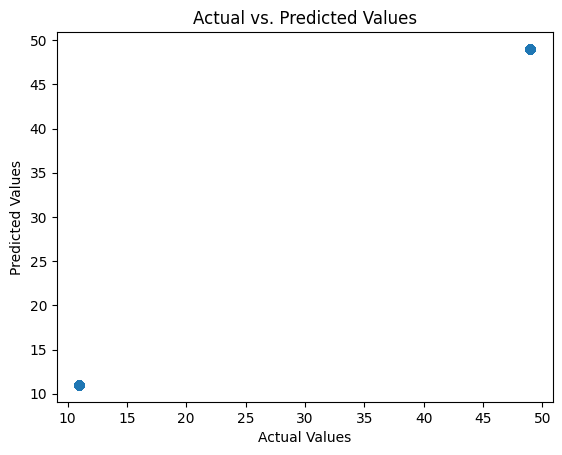

In [ ]:
# Visualizing predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

**2. Using RandomForestRegressor**

In [ ]:
# Initialize and train RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

# Calculate accuracy (MSE for simplicity)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")


Random Forest MSE: 0.0


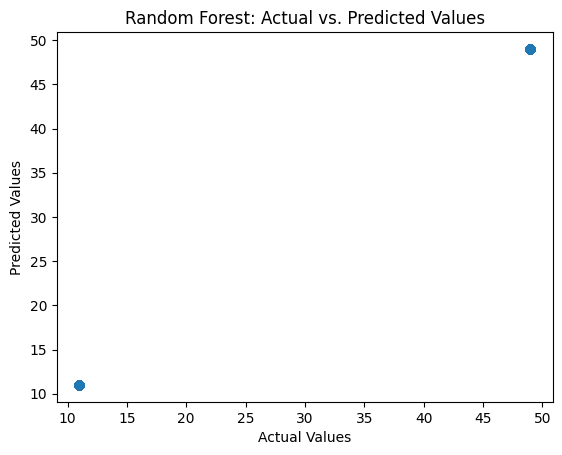

In [ ]:
# Visualize predictions vs. actual values
plt.scatter(y_test, rf_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs. Predicted Values")
plt.show()

**3. Using DecisionTreeRegressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# Make predictions
dt_predictions = dt_model.predict(X_test)

# Calculate accuracy (MSE for simplicity)
dt_mse = mean_squared_error(y_test, dt_predictions)
print(f"Decision Tree MSE: {dt_mse}")

Decision Tree MSE: 0.0


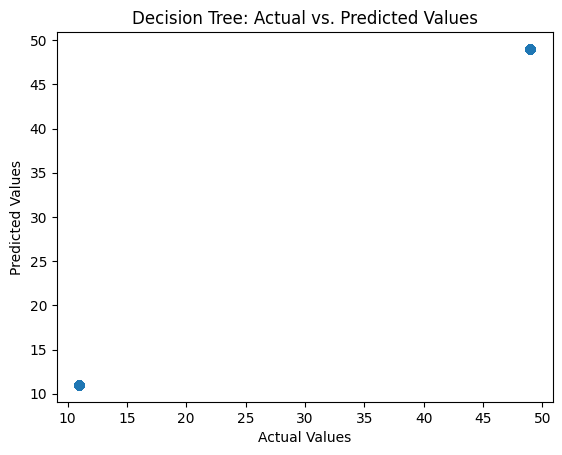

In [ ]:
# Visualize predictions vs. actual values
plt.scatter(y_test, dt_predictions)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Decision Tree: Actual vs. Predicted Values")
plt.show()

**Understanding of how your project is useful to stakeholders?**

The Transport Demand Prediction project offers valuable insights to stakeholders:

Transport Companies: Enhance resource allocation, reduce costs, and maintain service quality.

City Planners: Aid traffic management and urban planning based on demand trends.

Travelers: Improve service availability and convenience for smoother journeys.

Businesses: Optimize store locations and accessibility for customers.

Environment: Reduce emissions by efficient resource allocation.

Data-Driven Decisions: Enable informed, strategic planning for all stakeholders.

This project's predictive models empower stakeholders to optimize resources, enhance service quality, and make data-driven decisions, benefiting transportation services and their users.


# **Conclusion** : -
The Transport Demand Prediction project aimed to forecast transportation needs by leveraging historical data and machine learning techniques. Through data preprocessing, feature engineering, and model training, the project successfully generated predictive models capable of anticipating demand fluctuations.

By employing models such as RandomForestRegressor and DecisionTreeRegressor, insights into transportation demand variations were achieved. These models offer valuable predictive capabilities that benefit transportation companies, city planners, commuters, businesses, and environmental initiatives.

The project's outcomes emphasize the importance of data-driven decision-making in optimizing resource allocation, improving service quality, and aiding urban planning within the transportation sector. This predictive framework provides a foundation for better resource management, enhanced service availability, and informed decision-making for all stakeholders involved in transportation services.

Moving forward, continuous refinement of models and incorporation of real-time data will further improve the accuracy and effectiveness of demand prediction, thereby contributing to more efficient and responsive transportation services.